# Decision Tree Classifier for Student Stress Level

This notebook demonstrates how to build, train, evaluate, and visualize a decision tree classifier to predict student stress levels using the StressLevelDataset.

In [2]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv(r'C:\Users\isai5\OneDrive\Documentos\Github\databases\StressLevelDataset.csv')
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [4]:
# Prepare features and target variable
# Select only numeric columns except 'stress_level' as features
X = df.drop('stress_level', axis=1).select_dtypes(include=['number'])
y = df['stress_level']

# Drop rows with missing values (if any)
X = X.dropna()
y = y[X.index]

In [5]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Accuracy: 0.89


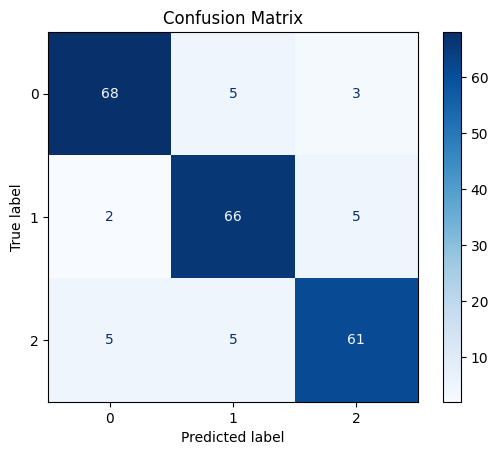

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        76
           1       0.87      0.90      0.89        73
           2       0.88      0.86      0.87        71

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



In [8]:
# Evaluate the model
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=dt.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report:')
print(classification_report(y_test, y_pred))

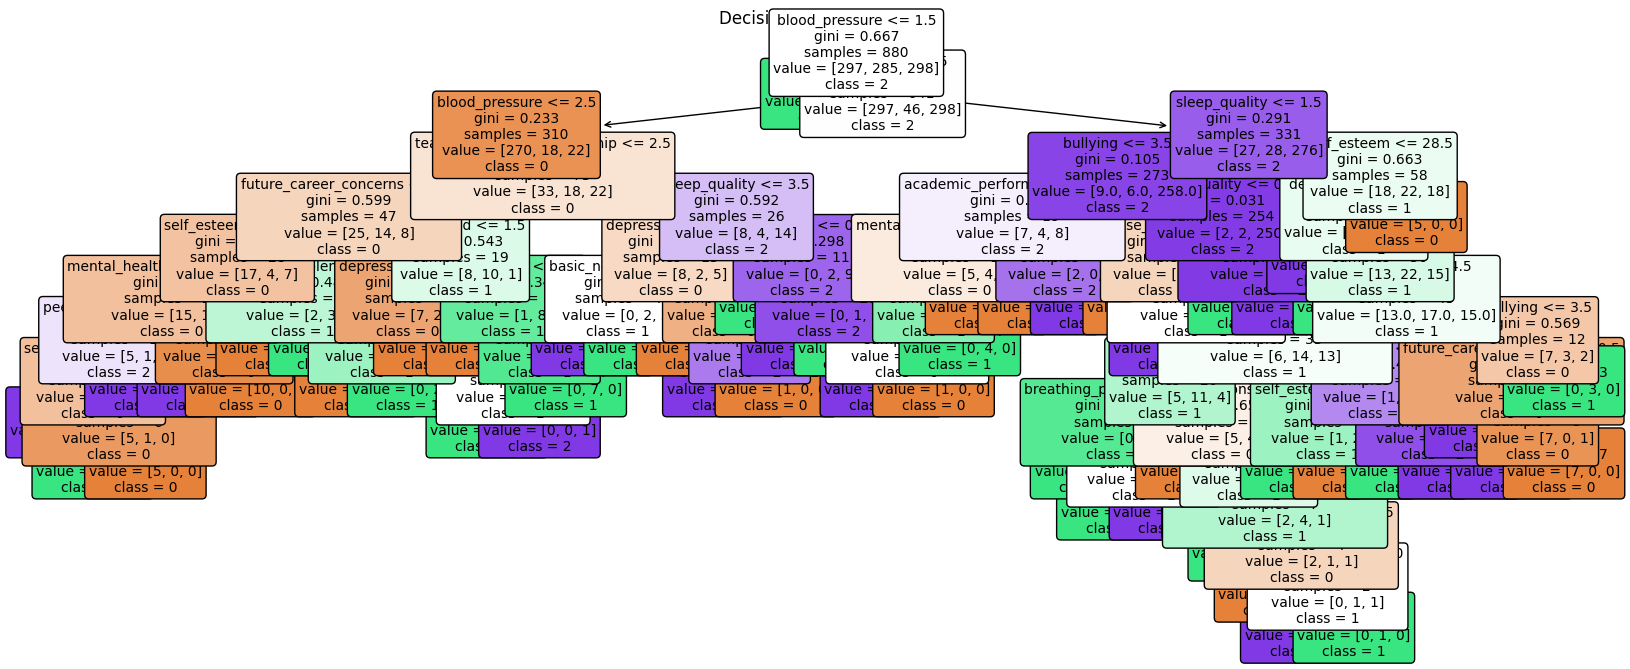

In [9]:
# Visualize the trained decision tree
plt.figure(figsize=(20,8))
plot_tree(dt, feature_names=X.columns, class_names=[str(c) for c in dt.classes_], filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Structure')
plt.show()